# 따릉이

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Data/따릉이/train.csv')
test = pd.read_csv('Data/따릉이/train.csv')

## 데이터 기본 정보 파악

In [3]:
train.shape

(1459, 11)

In [4]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

In [5]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [7]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


## 결측치(Null) 확인 및 처리

In [8]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [9]:
train.fillna(train.mean(), inplace=True) # Or could .dropna()

test.fillna(test.mean(), inplace=True)

## 데이터 분포 & 이상치 확인

<Axes: xlabel='hour_bef_temperature', ylabel='Count'>

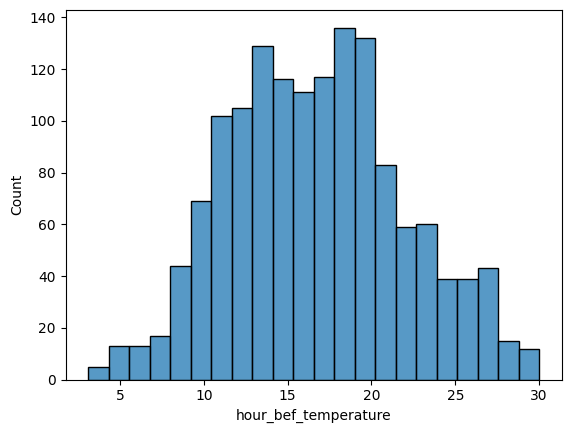

In [10]:
sns.histplot(train['hour_bef_temperature'])

<Axes: xlabel='hour_bef_humidity'>

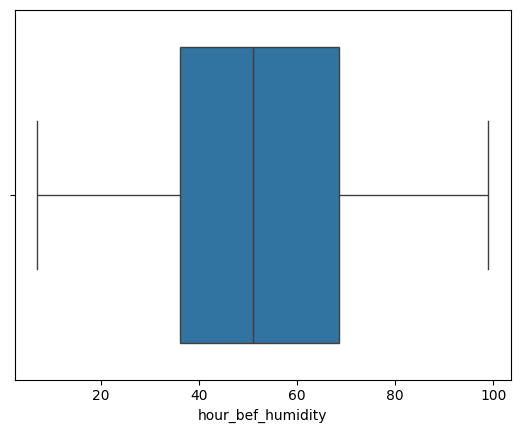

In [11]:
sns.boxplot(x=train['hour_bef_humidity'])

## 범주형 / 시간형 변수 파악

In [12]:
train['hour'].value_counts()

hour
20    61
4     61
5     61
11    61
22    61
19    61
15    61
7     61
8     61
10    61
1     61
14    61
9     61
3     61
2     61
18    61
23    61
6     61
12    61
13    60
17    60
16    60
0     60
21    60
Name: count, dtype: int64

## 타켓 변수와의 관계 확인

<Axes: xlabel='hour_bef_temperature', ylabel='count'>

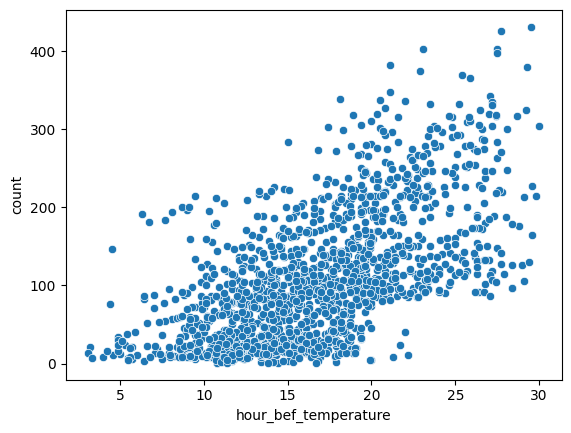

In [13]:
sns.scatterplot(x='hour_bef_temperature', y='count', data=train)

<Axes: >

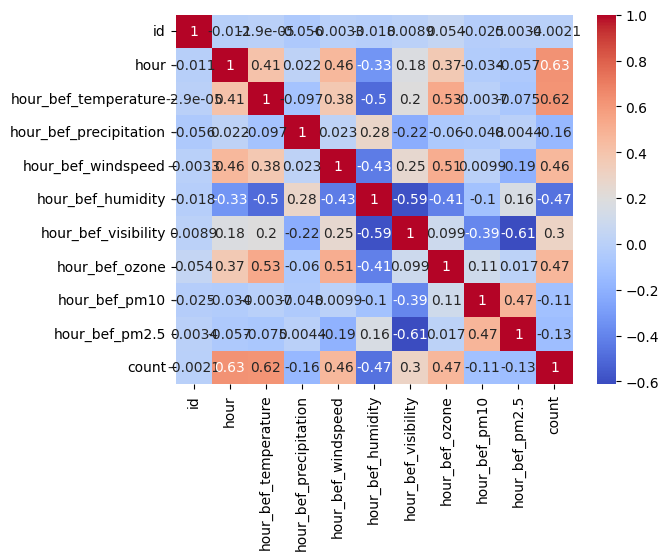

In [14]:
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

## 모델 정의 및 학습

In [15]:
train_x = train.drop(['count'], axis=1)
train_y = train['count']

In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(train_x, train_y)

RandomForestRegressor()

In [19]:
pred = model.predict(test.drop(['count'], axis=1))

In [21]:
pred == test['count']

0       False
1       False
2       False
3       False
4       False
        ...  
1454    False
1455    False
1456    False
1457    False
1458    False
Name: count, Length: 1459, dtype: bool

# 와인 품질

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 기본 정보 파악

In [2]:
train = pd.read_csv('Data/와인/train.csv')
test = pd.read_csv('Data/와인/test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [3]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [4]:
train.shape

(5497, 14)

In [5]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


## 결측치 (Null) 확인 및 처리

In [6]:
train.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [7]:
train['quality']

0       5
1       5
2       5
3       6
4       6
       ..
5492    5
5493    6
5494    7
5495    5
5496    6
Name: quality, Length: 5497, dtype: int64

## Simple EDA

<Axes: >

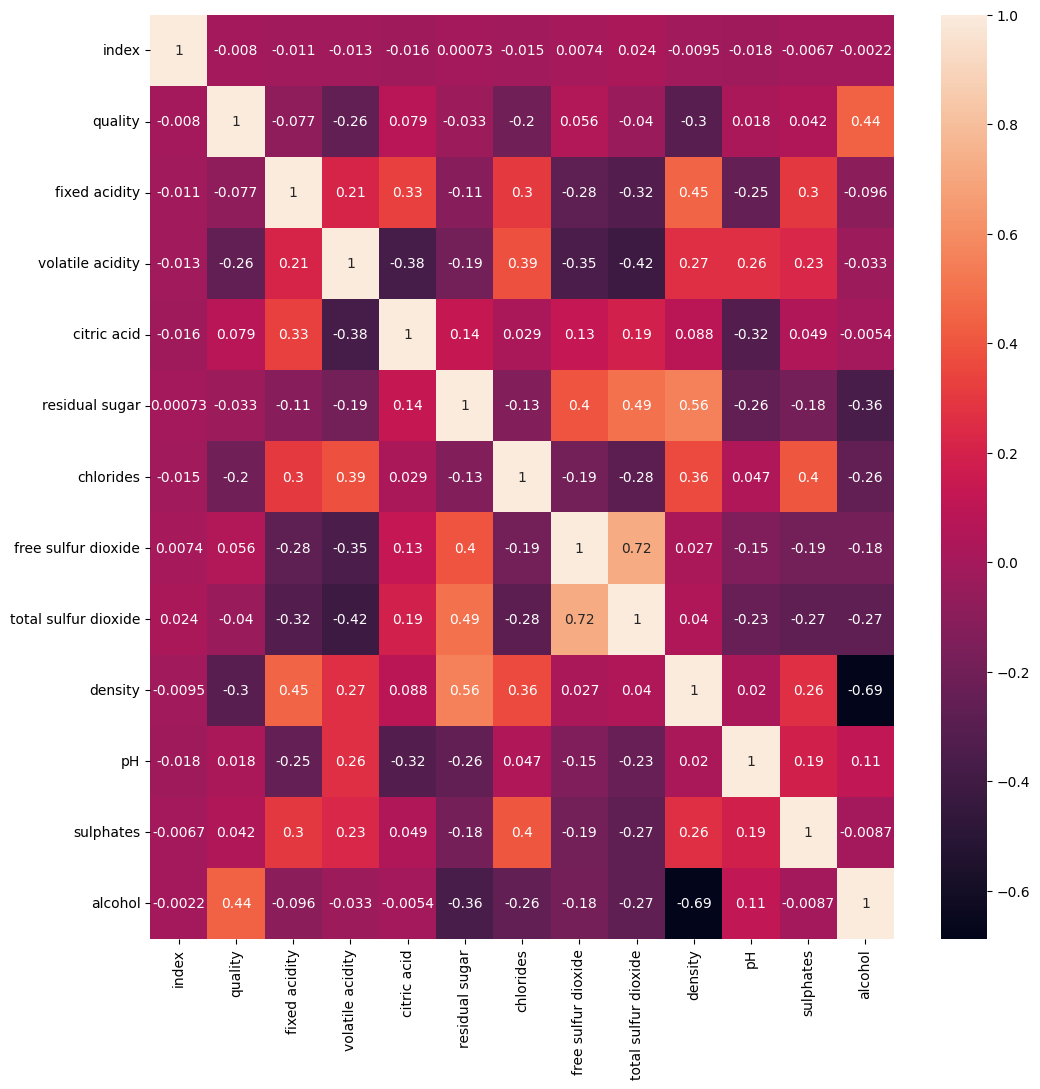

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(data=train.drop(['type'], axis=1).corr(), annot=True)

/var/folders/5_/_m32gpxn3651dzz655tkwqzw0000gn/T/ipykernel_36039/2362575408.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.iloc[:, i])
/var/folders/5_/_m32gpxn3651dzz655tkwqzw0000gn/T/ipykernel_36039/2362575408.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.iloc[:, i])
/var

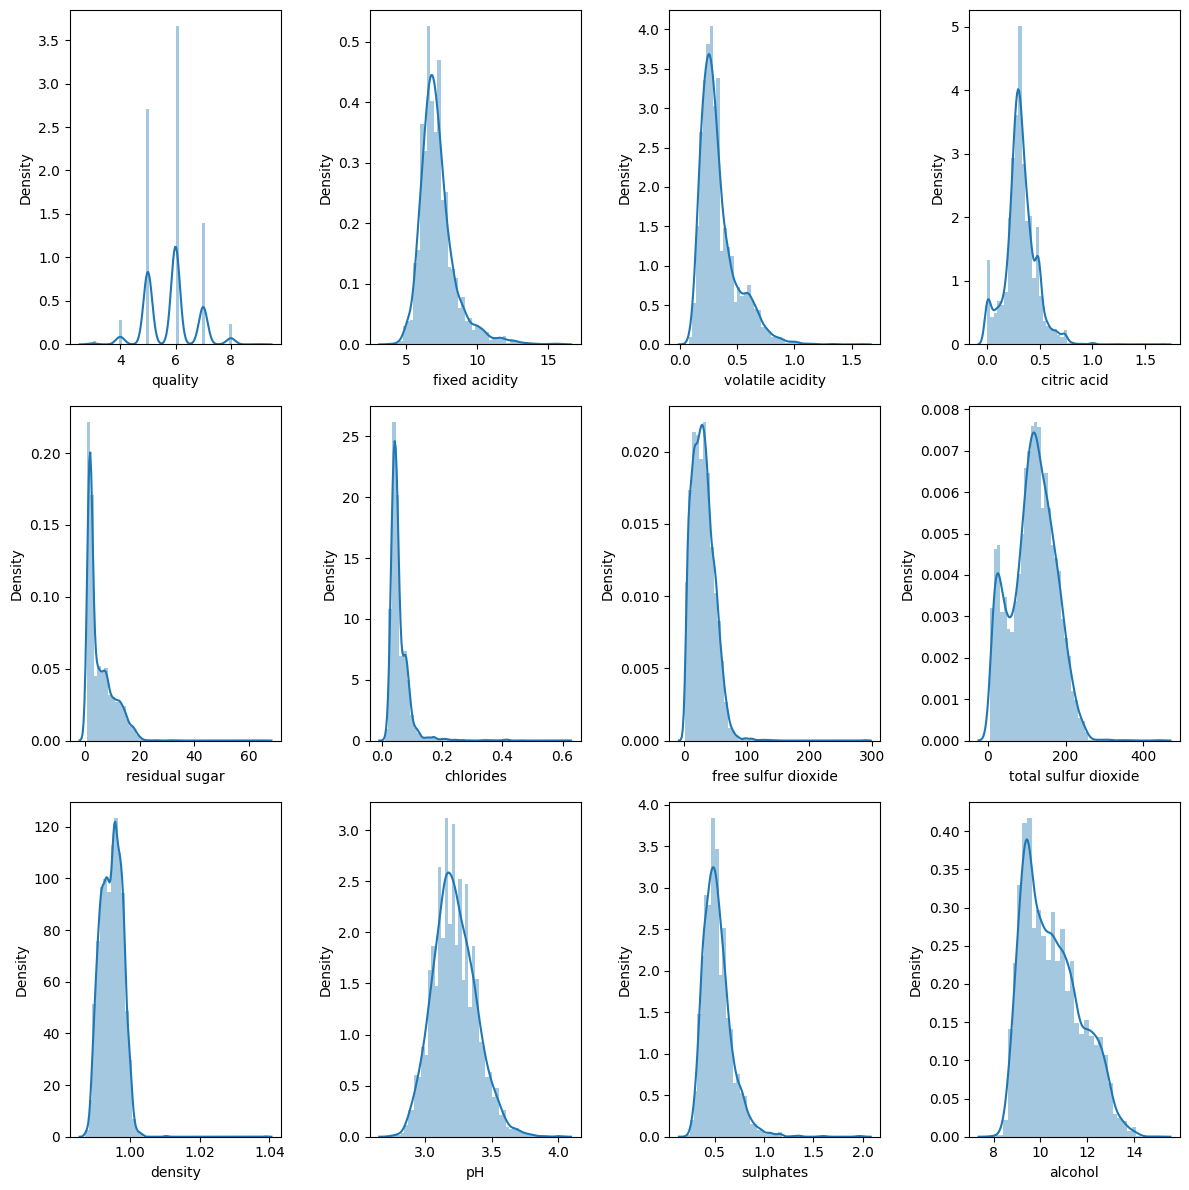

In [12]:
# train의 각 변수별 분포를 살펴봅미낟
plt.figure(figsize=(12,12))
for i in range(1, 13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:, i])
plt.tight_layout()
plt.show()

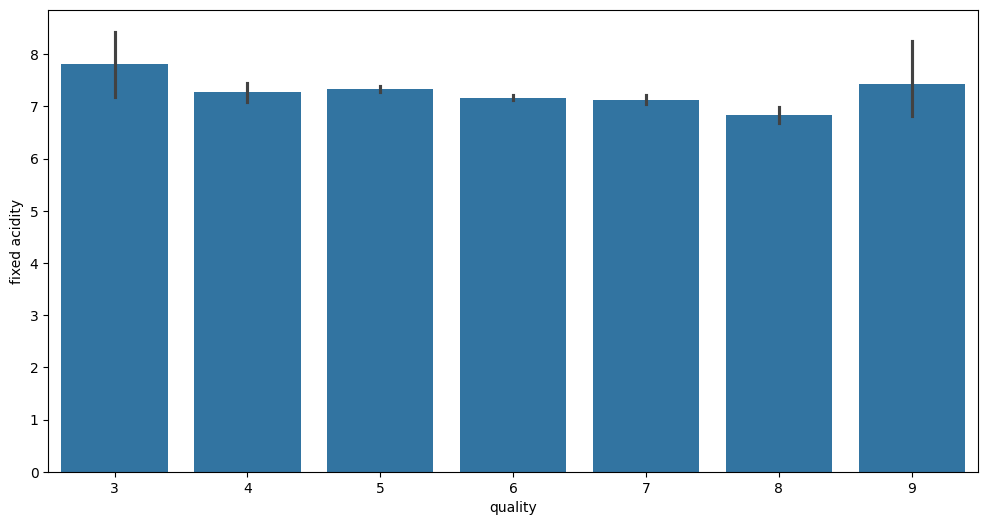

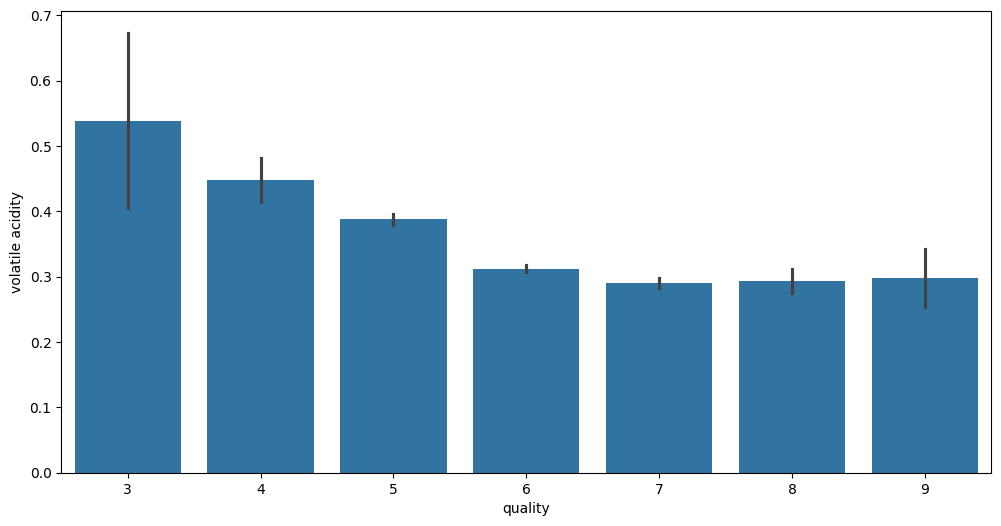

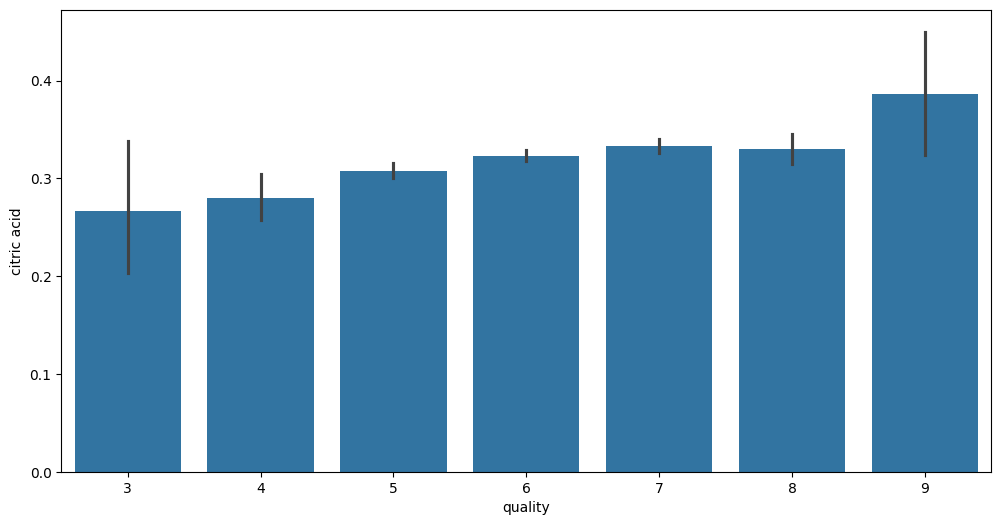

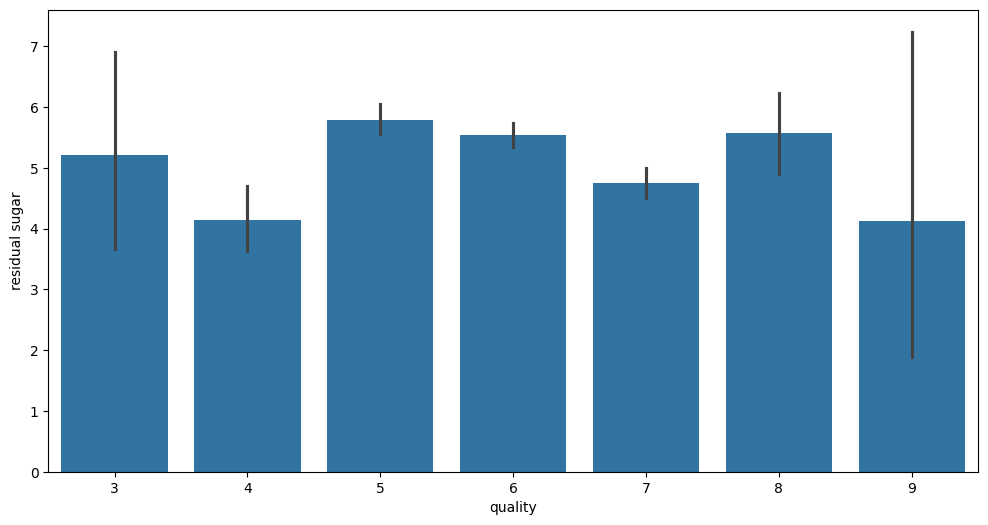

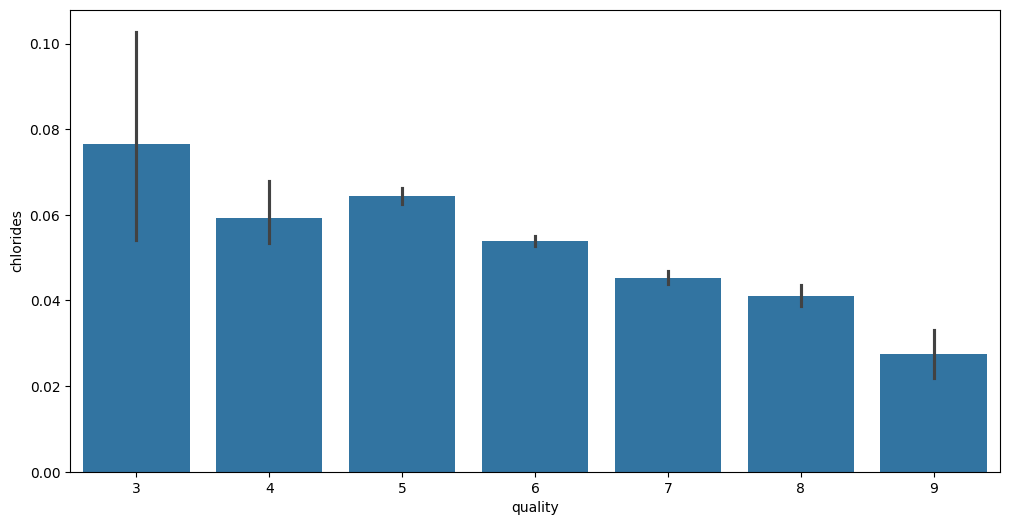

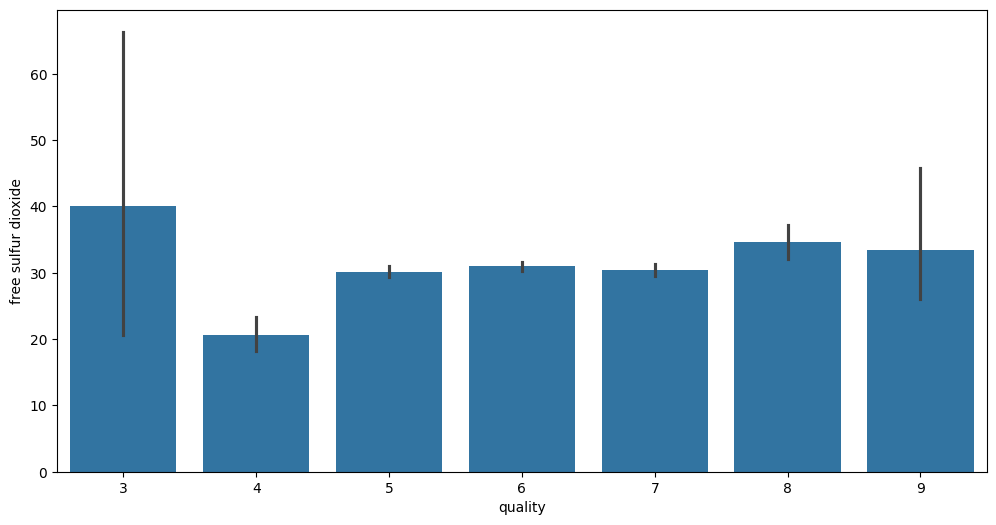

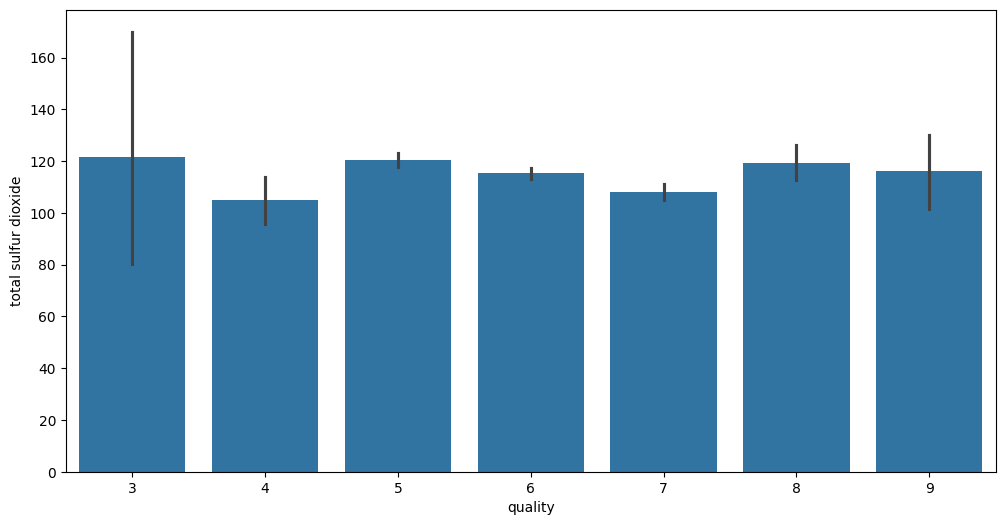

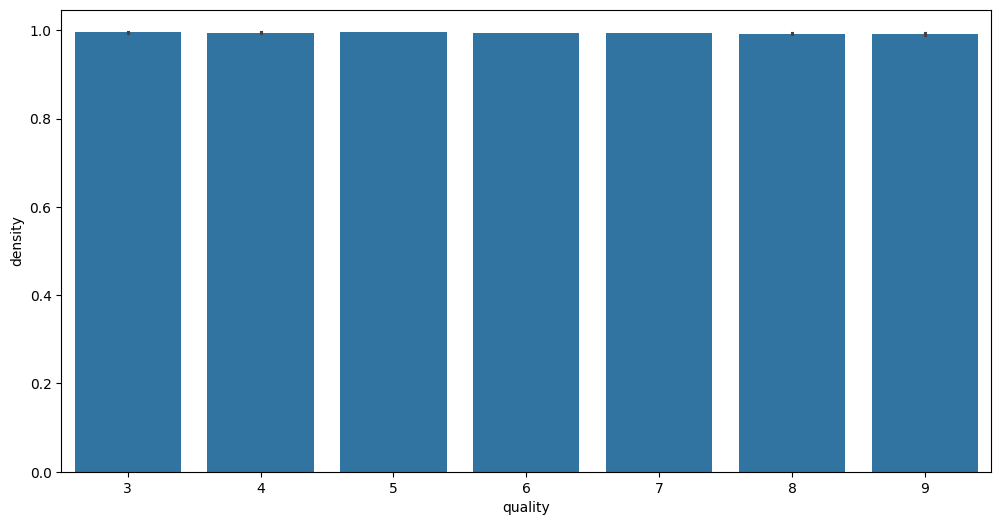

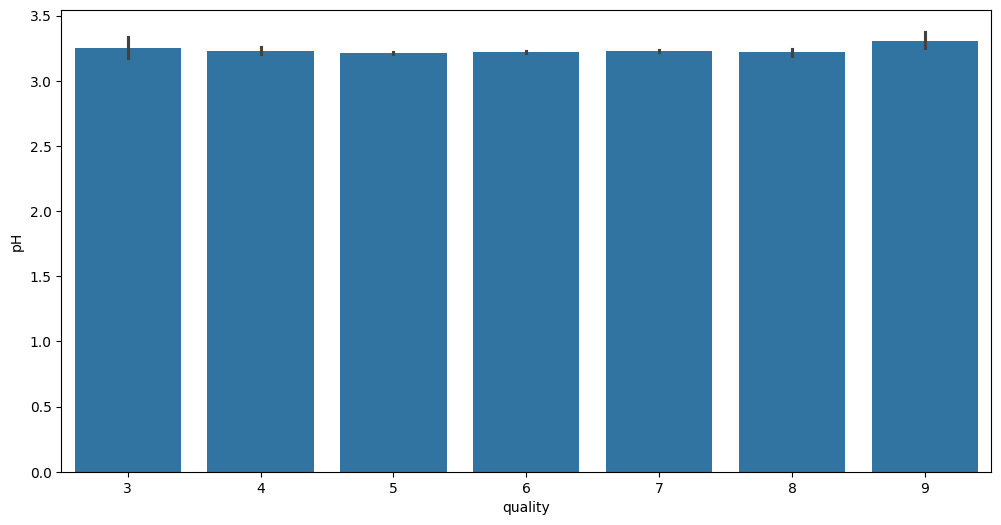

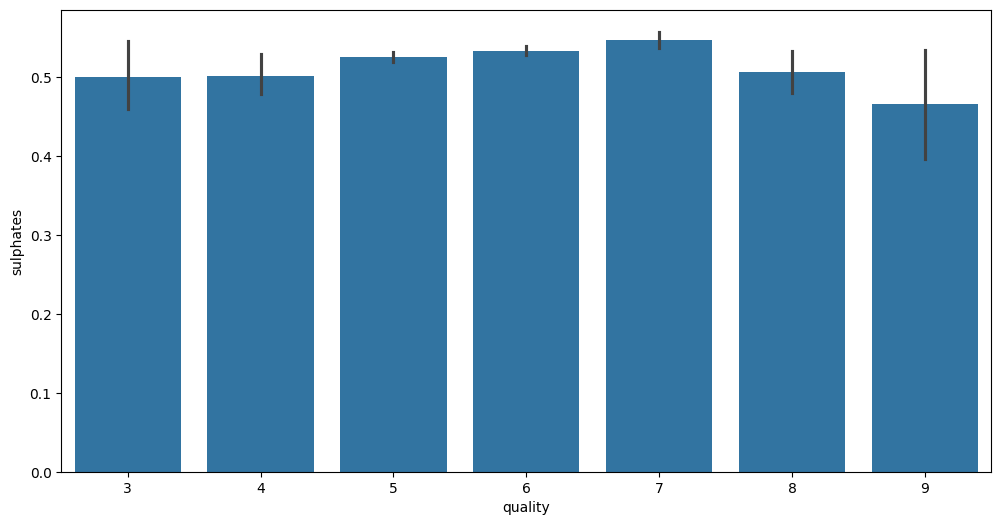

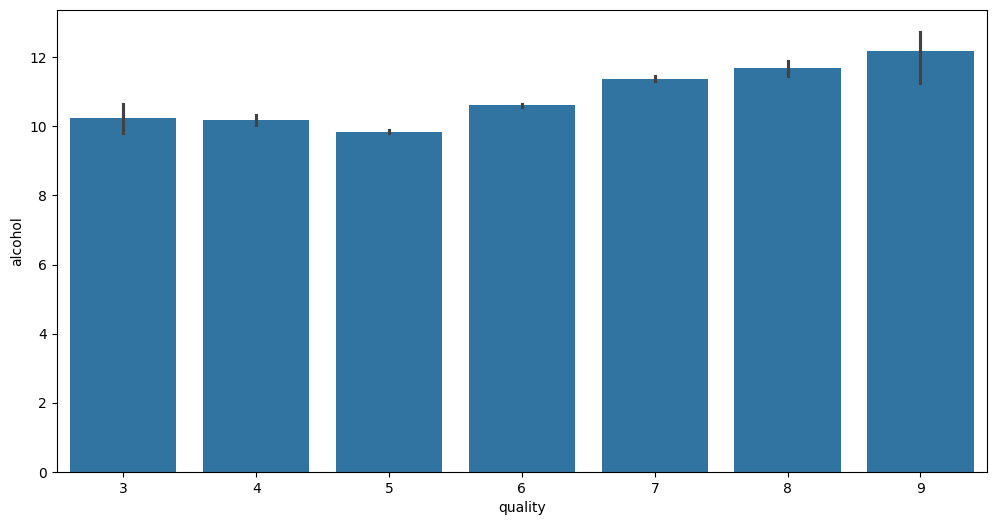

In [32]:
# train에서 각 변수와 quality 변수 사이 분포를 확인합니다
for i in range(11):
    fig = plt.figure(figsize=(12,6))
    sns.barplot(x='quality', y=train.columns[i+2], data=train)

## 모델 정의 및 학습

In [25]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
train_x = train.drop(['quality'], axis=1)
train_y = train['quality']

In [27]:
model.fit(train_x, train_y)
model

RandomForestClassifier()

In [29]:
pred = model.predict(test)

# 부동산가격

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [152]:
train = pd.read_csv('Data/부동산/train.csv')
test = pd.read_csv('Data/부동산/test.csv')

In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [154]:
train.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06
mean,6.091530e+05,6.299685e+03,7.816549e+01,1.998297e+03,2.012984e+05,9.343291e+00,3.822769e+04
std,3.526198e+05,3.581169e+03,2.915113e+01,8.941347e+00,2.905732e+02,6.606500e+00,3.104898e+04
min,0.000000e+00,0.000000e+00,9.260000e+00,1.961000e+03,2.008010e+05,-4.000000e+00,1.000000e+02
25%,3.041380e+05,3.345000e+03,5.976000e+01,1.993000e+03,2.010100e+05,4.000000e+00,1.900000e+04
50%,6.082760e+05,5.964000e+03,8.241000e+01,1.999000e+03,2.013120e+05,8.000000e+00,3.090000e+04
75%,9.124140e+05,9.436000e+03,8.497000e+01,2.005000e+03,2.015110e+05,1.300000e+01,4.700000e+04
max,1.234827e+06,1.265800e+04,4.243200e+02,2.017000e+03,2.017110e+05,8.000000e+01,8.200000e+05


In [155]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [156]:
train.shape

(1216553, 13)

In [157]:
train['dong'].nunique()

473

In [158]:
train['dong'].value_counts()

dong
상계동    29346
좌동     23255
화명동    21511
용호동    17398
중계동    17079
       ...  
주성동        2
누상동        2
옥인동        1
구수동        1
효제동        1
Name: count, Length: 473, dtype: int64

In [121]:
# transform transaction_date into three categories 1~10, 11~20, 21~31
train['transaction_date'] = train['transaction_date'].apply(lambda x: '21~31' if x in ['21~28', '21~29', '21~30'] else x)
test['transaction_date'] = test['transaction_date'].apply(lambda x: '21~31' if x in ['21~28', '21~29', '21~30'] else x)

In [122]:
# transform transaction_year_month to two separate columns

In [123]:
# train['transaction_year'], train['transaction_month'] = train['tran']
train['year'] = train['transaction_year_month'].apply(lambda x: str(x)[:4])
train['month'] = train['transaction_year_month'].apply(lambda x: str(x)[4:])
test['year'] = test['transaction_year_month'].apply(lambda x: str(x)[:4])
test['month'] = test['transaction_year_month'].apply(lambda x: str(x)[4:])

In [124]:
# transform city, dong, jibun, apt with label_encoder

In [171]:
# from sklearn.preprocessing import LabelEncoder
# labelEncoder_City = LabelEncoder()
# labelEncoder_City.fit(train['city'])
# train['city'] = labelEncoder_City.transform(train['city'])
from sklearn.preprocessing import OrdinalEncoder
cat_cols = ['city', 'dong', 'jibun', 'apt', 'transaction_date']

# Initialize encoder
ord_enc = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

# Fit on training data and transform both train/test
train[cat_cols] = ord_enc.fit_transform(train[cat_cols])
test[cat_cols] = ord_enc.transform(test[cat_cols])

In [172]:
cleaned_train = train.drop(['addr_kr', 'transaction_year_month'], axis=1)
cleaned_test = test.drop(['addr_kr', 'transaction_year_month'], axis=1)

In [173]:
cleaned_train

,transaction_id,apartment_id,city,dong,jibun,apt,exclusive_use_area,year_of_completion,transaction_date,floor,transaction_real_price
0,0,7622,0.0,257.0,6326.0,6369.0,84.8200,2002,5.0,2,37500
1,1,5399,0.0,437.0,1492.0,4529.0,99.1700,1973,1.0,6,20000
2,2,3578,0.0,437.0,2392.0,2969.0,84.7400,2007,1.0,6,38500
3,3,10957,0.0,68.0,8671.0,9130.0,146.3900,2003,0.0,15,118000
4,4,10639,0.0,68.0,540.0,8875.0,194.4300,2004,5.0,3,120000
...,...,...,...,...,...,...,...,...,...,...,...
1216548,1234823,9578,1.0,382.0,1419.0,8012.0,59.8245,2012,0.0,3,22000
1216549,1234824,9578,1.0,382.0,1419.0,8012.0,84.9923,2012,4.0,7,30750
1216550,1234825,9578,1.0,382.0,1419.0,8012.0,84.9923,2012,4.0,9,29500
1216551,1234826,9586,1.0,382.0,1362.0,8019.0,101.7400,2008,4.0,7,26700


In [174]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
train_x = cleaned_train.drop(['transaction_real_price'], axis=1)
train_y = cleaned_train['transaction_real_price']
model.fit(train_x, train_y)

RandomForestRegressor()

In [175]:
test_pred = model.predict(cleaned_test)

In [176]:
test_pred

array([28447. , 91475. , 49842.5, ..., 46480.5, 52583.5, 61766. ])

# Hyundai Capital Practice Problems (GPT)

## 1. Pandas 활용문제 (Data Manipulation)
Tasks:

1. 2024년 월별 매출 (revenue = quantity * amount) 합계를 구하고 내림차순 정령
2. city별 고객(unique customer_id)수와 총 매출을 구하고, 매출 Top3 도시 출력
3. product x city 피벗 테이블로 매출 합계를 구성 (행=product, 열=city, 값=sum of revenue)
4. 고객별러 가장 **가장 최근 거래일**과 **누적 매출**을 구한 요약 데이블 만들기
5. product가 *Savings* 또는 *CreditCard*인 거래만 필터링하여 월별 건수 집계
6. 각 city 별로 매출 (revenue)이 가장 높은 product를 구하시오. 결과에는 city, top_product, top_revenue 열을 포함하십시오.
7. 전체 고객 중 누적 매출(revenue) 상위 10%에 해당하는 고객을 찾아, 이들의 편균 거래 금액(amount)과 거래 횟수(transaction_id count)를 구하시오.
8. 월별 매출 (revenue)의 전월 대비 증감률(%)을 계산하시오.
9. 각 고객이 구매한 product의 고유 개수를 구하고, 그 수가 3개 이상인 고객만 필터링하여 보여주세요 (출력: customer_id, unique_products, total_revenue)
10. 각 city별 월별 매출 합계를 구하고, 이를 pivot 테이블 형태로 표현하세요. (행: city, 열: month, 값: revenue 합계). 그리고 각 도시별 **최고 매출 달 (month)**을 구하세요.
11. 같은 달(month)에 2건 이상 거래한 고객을 찾고, 고객별 거래 건수, 총매물, city를 보여주세요.
12. 각 city 내에서 product별 매출 비율(%)을 구하세요 (예: 서울특별시에서 CardLoad 매출이 전체의 35%)
13. 고객별로 첫 거래월과 마지막 거래월을 구하고, 두 월의 차이를 개월 수로 계산하세요 (active_months). 편균적으로 고객은 몇 개월 동안 활동했나요?
14. 각 product별 매출(revenue) 분포에서, 상위 1% 이상 (quantile(0.99))의 거래만 필터링해 city별로 그 비율(%)을 구하세요.
15. 각 월(month)마다 거래한 고객의 고유 수를 구하세요. 그리고 전월 대비 고객 수 증가율(%)을 계산하세요.

In [420]:
import pandas as pd

In [421]:
df = pd.read_csv('Data/HyundaiCapitalPracticeTest/hyundae_capital_p1_transactions.csv')
df.head()

,transaction_id,customer_id,date,product,quantity,amount,city,revenue
0,T000000,C0015,2024-01-18,Savings,2,502530.0,인천광역시,1005060.0
1,T000001,C0040,2024-06-03,FX,3,81420.0,경기도,244260.0
2,T000002,C0015,2024-05-10,Savings,1,285140.0,경기도,285140.0
3,T000003,C0027,2024-03-28,AutoLoan,2,631050.0,부산광역시,1262100.0
4,T000004,C0053,2024-03-27,AutoLoan,3,240900.0,부산광역시,722700.0


### 1. 2024년 월별 매출 (revenue = quantity * amount) 합계를 구하고 내림차순 정령

In [422]:
df['year'] = df['date'].apply(lambda x: int(x.split('-')[0]))
df['month'] = df['date'].apply(lambda x: int(x.split('-')[1]))
df['day'] = df['date'].apply(lambda x: int(x.split('-')[2]))
df_2024 = df[df['year'] == 2024]
df_2024.groupby(['month']).agg(
    total_revenue = ('revenue', 'sum')
).sort_values(by='total_revenue', ascending=False)

,total_revenue
month,
5,54280750.0
6,52212790.0
4,44971440.0
3,41836150.0
2,41190800.0
1,39570130.0
7,17427710.0


### 2. city별 고객(unique customer_id)수와 총 매출을 구하고, 매출 Top3 도시 출력

In [425]:
temp = df.copy()
temp.groupby(['city']).agg(
    unique_customer_count = ('customer_id', 'nunique'),
    total_revenue = ('revenue', 'sum')
).reset_index().sort_values(by='total_revenue', ascending=False).iloc[:3]

,city,unique_customer_count,total_revenue
3,서울특별시,58,124224290.0
0,경기도,35,62992990.0
2,부산광역시,28,44201570.0


### 3. product x city 피벗 테이블로 매출 합계를 구성 (행=product, 열=city, 값=sum of revenue)

In [429]:
temp = df.copy()
temp = temp[['product', 'city', 'revenue']]
temp = temp.pivot_table(index='product', columns='city', values='revenue', aggfunc='sum')
temp.fillna(0)

city,경기도,대구광역시,부산광역시,서울특별시,인천광역시
product,,,,,
AutoLoan,6260410.0,5285290.0,7044870.0,14842400.0,5254100.0
CardLoan,24093480.0,8820870.0,12633200.0,22430190.0,4165170.0
CreditCard,7422810.0,2870700.0,6914630.0,34956860.0,6194980.0
FX,3987580.0,0.0,0.0,8059810.0,749970.0
Insurance,2399550.0,0.0,1539660.0,7190510.0,7127480.0
Mortgage,2687310.0,5684650.0,4057860.0,11368660.0,4106740.0
Savings,16141850.0,3831350.0,12011350.0,25375860.0,5979620.0


### 4. 고객별러 가장 가장 최근 거래일과 누적 매출을 구한 요약 데이블 만들기

In [430]:
temp = df.copy()
temp.groupby('customer_id').agg(
    latest_transaction_date = ('date', 'max'),
    total_revenue = ('revenue', 'sum')
).reset_index().sort_values(by='total_revenue', ascending=False)

,customer_id,latest_transaction_date,total_revenue
69,C0074,2024-06-30,12382200.0
21,C0023,2024-07-12,12164000.0
1,C0002,2024-06-29,10663770.0
10,C0012,2024-06-20,10333530.0
50,C0053,2024-07-03,9365030.0
...,...,...,...
65,C0070,2024-06-19,778950.0
68,C0073,2024-01-26,728420.0
15,C0017,2024-06-02,671000.0
16,C0018,2024-04-21,668410.0


### 5. product가 *Savings* 또는 *CreditCard*인 거래만 필터링하여 월별 건수 집계

In [432]:
temp = df[(df['product'] == 'Savings') |(df['product'] == 'CreditCard')]
temp.groupby('month').agg(
    count = ('transaction_id', 'count')
).reset_index().sort_values(by='count', ascending=False)

,month,count
0,1,23
3,4,18
4,5,18
5,6,17
1,2,13
2,3,13
6,7,9


### 6. 각 city 별로 매출 (revenue)이 가장 높은 product를 구하시오. 결과에는 city, top_product, top_revenue 열을 포함하십시오.

In [279]:
df.head()
temp = df.groupby(['city', 'product']).agg(
    top_revenue = ('revenue', sum)
)
temp.loc[temp.groupby('city')['top_revenue'].idxmax()].sort_values(by='top_revenue', ascending=False)

/var/folders/5_/_m32gpxn3651dzz655tkwqzw0000gn/T/ipykernel_36039/2355830858.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  temp = df.groupby(['city', 'product']).agg(


,,top_revenue
city,product,
서울특별시,CreditCard,34956860.0
경기도,CardLoan,24093480.0
부산광역시,CardLoan,12633200.0
대구광역시,CardLoan,8820870.0
인천광역시,Insurance,7127480.0


### 7. 전체 고객 중 누적 매출(revenue) 상위 10%에 해당하는 고객을 찾아, 이들의 평균 거래 금액(amount)과 거래 횟수(transaction_id count)를 구하시오.

In [300]:
top_ten_percent = int(df['customer_id'].nunique() * 0.1)
summary = (df.groupby('customer_id').agg(
    total_revenue = ('revenue', 'sum'),
    average_amount = ('amount', 'mean'),
    transaction_count = ('transaction_id', 'count')
).sort_values('total_revenue', ascending=False))
top_ten_customer = summary.iloc[:top_ten_percent]
print(top_ten_customer[['average_amount', 'transaction_count']].mean())

average_amount       640142.658730
transaction_count         7.285714
dtype: float64


### 8. 월별 매출 (revenue)의 전월 대비 증감률(%)을 계산하시오.

In [311]:
first = df.groupby('month').agg(
    total_revenue = ('revenue', 'sum'),
)

second = first.pct_change()

pd.concat([first, second], axis=1)

,total_revenue,total_revenue
month,,
1,39570130.0,NaN
2,41190800.0,0.040957
3,41836150.0,0.015667
4,44971440.0,0.074942
5,54280750.0,0.207005
6,52212790.0,-0.038097
7,17427710.0,-0.666218


In [313]:
monthly = df.groupby('month').agg(
    total_revenue = ('revenue', 'sum')
)

monthly['prev_revenue'] = monthly['total_revenue'].shift(1)
monthly['mom_growth_pct'] = (
    (monthly['total_revenue'] - monthly['prev_revenue']) /
    monthly['prev_revenue']
) * 100
monthly

,total_revenue,prev_revenue,mom_growth_pct
month,,,
1,39570130.0,NaN,NaN
2,41190800.0,39570130.0,4.095690
3,41836150.0,41190800.0,1.566733
4,44971440.0,41836150.0,7.494213
5,54280750.0,44971440.0,20.700493
6,52212790.0,54280750.0,-3.809748
7,17427710.0,52212790.0,-66.621761


### 9. 각 고객이 구매한 product의 고유 개수를 구하고, 그 수가 3개 이상인 고객만 필터링하여 보여주세요 (출력: customer_id, unique_products, total_revenue)

In [328]:
temp = df.groupby(['customer_id']).agg(
    product_count = ('product', 'nunique'),
    total_revenue = ('revenue', 'sum')
).sort_values('product_count', ascending=False)
temp = temp[temp['product_count'] >= 3]
temp.reset_index()

,customer_id,product_count,total_revenue
0,C0074,6,12382200.0
1,C0066,5,4603870.0
2,C0048,5,6844660.0
3,C0010,5,6706490.0
4,C0023,5,12164000.0
5,C0079,4,3770730.0
6,C0041,4,3454340.0
7,C0002,4,10663770.0
8,C0035,4,4185060.0
9,C0027,4,4293560.0


### 10. 각 city별 월별 매출 합계를 구하고, 이를 pivot 테이블 형태로 표현하세요. (행: city, 열: month, 값: revenue 합계). 그리고 각 도시별 **최고 매출 달 (month)**을 구하세요.

In [346]:
temp = df.groupby(['city', 'month']).agg(
    total_revenue = ('revenue', 'sum')
).reset_index()
temp = temp.pivot_table(index='city', columns='month', values='total_revenue')
temp

month,1,2,3,4,5,6,7
city,,,,,,,
경기도,3185670.0,8476870.0,11979150.0,7714030.0,19030190.0,10958740.0,1648340.0
대구광역시,1146460.0,NaN,4288660.0,2432540.0,6169940.0,3908790.0,8546470.0
부산광역시,7135060.0,8782750.0,4798460.0,8130730.0,10471890.0,4389620.0,493060.0
서울특별시,18635400.0,16768060.0,18940870.0,24672840.0,16338990.0,22740440.0,6127690.0
인천광역시,9467540.0,7163120.0,1829010.0,2021300.0,2269740.0,10215200.0,612150.0


In [347]:
temp = df.groupby(['city', 'month']).agg(
    total_revenue = ('revenue', 'sum')
).reset_index()
temp.loc[temp.groupby('city')['total_revenue'].idxmax()][['city', 'month']]

,city,month
4,경기도,5
12,대구광역시,7
17,부산광역시,5
23,서울특별시,4
32,인천광역시,6


### 11. 같은 달(month)에 2건 이상 거래한 고객을 찾고, 고객별 거래 건수, 총매물, city를 보여주세요.

In [371]:
temp = df
temp = temp.groupby(['customer_id', 'city', 'month']).agg(
    transaction_count = ('transaction_id', 'count'),
    total_revenue = ('revenue', 'sum')
).reset_index().sort_values('total_revenue', ascending=False)
temp[temp['transaction_count'] >= 2]

,customer_id,city,month,transaction_count,total_revenue
38,C0012,인천광역시,6,2,3683820.0
213,C0074,서울특별시,6,2,2824140.0
160,C0054,서울특별시,1,2,2737190.0
216,C0075,서울특별시,1,3,2622210.0
80,C0025,서울특별시,1,2,2422800.0
5,C0002,서울특별시,3,2,2221100.0
26,C0010,서울특별시,3,2,2206580.0
7,C0002,서울특별시,6,3,1957270.0
225,C0077,서울특별시,2,2,1945610.0
192,C0066,서울특별시,6,2,1891930.0


### 12. 각 city 내에서 product별 매출 비율(%)을 구하세요 (예: 서울특별시에서 CardLoad 매출이 전체의 35%)

In [391]:
temp = df.copy()
city_product = (
    temp.groupby(['city', 'product']).agg(
        total_revenue_city_product = ('revenue', 'sum')
    ).reset_index()
)

city_total = (
    temp.groupby(['city']).agg(
        total_revenue_city = ('revenue', 'sum')
    ).reset_index()
)

result = city_product.merge(city_total, on='city')
result['revenue_share_pct'] = 100 * result['total_revenue_city_product'] / result['total_revenue_city']
result = result.sort_values(['city','revenue_share_pct'], ascending=[True,False])
result

,city,product,total_revenue_city_product,total_revenue_city,revenue_share_pct
1,경기도,CardLoan,24093480.0,62992990.0,38.247875
6,경기도,Savings,16141850.0,62992990.0,25.624835
2,경기도,CreditCard,7422810.0,62992990.0,11.783549
0,경기도,AutoLoan,6260410.0,62992990.0,9.938265
3,경기도,FX,3987580.0,62992990.0,6.330196
5,경기도,Mortgage,2687310.0,62992990.0,4.266046
4,경기도,Insurance,2399550.0,62992990.0,3.809233
8,대구광역시,CardLoan,8820870.0,26492860.0,33.295273
10,대구광역시,Mortgage,5684650.0,26492860.0,21.457291
7,대구광역시,AutoLoan,5285290.0,26492860.0,19.949866


In [393]:
temp = df
temp['total_revenue_city'] = temp.groupby('city')['revenue'].transform('sum')
temp['total_revenue_city_product'] = temp.groupby(['city', 'product'])['revenue'].transform('sum')
temp = temp[['city', 'product', 'total_revenue_city_product', 'total_revenue_city']]
temp = temp.drop_duplicates(['city', 'product'])
temp = temp.sort_values(['city', 'product'])
temp['revenue_share_pct'] = (temp['total_revenue_city_product']/temp['total_revenue_city']) * 100
temp.drop('total_revenue_city', axis=1).sort_values(by=['city', 'revenue_share_pct'], ascending=[True, False])

,city,product,total_revenue_city_product,revenue_share_pct
7,경기도,CardLoan,24093480.0,38.247875
2,경기도,Savings,16141850.0,25.624835
11,경기도,CreditCard,7422810.0,11.783549
26,경기도,AutoLoan,6260410.0,9.938265
1,경기도,FX,3987580.0,6.330196
122,경기도,Mortgage,2687310.0,4.266046
131,경기도,Insurance,2399550.0,3.809233
30,대구광역시,CardLoan,8820870.0,33.295273
63,대구광역시,Mortgage,5684650.0,21.457291
33,대구광역시,AutoLoan,5285290.0,19.949866


### 13. 고객별로 첫 거래월과 마지막 거래월을 구하고, 두 월의 차이를 개월 수로 계산하세요 (active_months). 편균적으로 고객은 몇 개월 동안 활동했나요?


In [400]:
first = df.copy()
first = first.groupby('customer_id').agg(
    first = ('month', 'min')
).reset_index()
second = df.copy()
second = second.groupby('customer_id').agg(
    second = ('month', 'max')
).reset_index()
result = first.merge(second, on='customer_id')
result['active_months'] = result['second'] - result['first'] + 1
result

,customer_id,first,second,active_months
0,C0001,3,5,3
1,C0002,2,6,5
2,C0003,2,6,5
3,C0004,1,2,2
4,C0006,4,4,1
...,...,...,...,...
70,C0075,1,4,4
71,C0076,1,7,7
72,C0077,1,6,6
73,C0078,5,5,1


In [435]:
result = df.copy()
result['first'] = result.groupby('customer_id')['month'].transform('min')
result['second'] = result.groupby('customer_id')['month'].transform('max')
result['active_months'] = result['second'] - result['first'] + 1
result = result[['customer_id', 'first', 'second', 'active_months']]
result.drop_duplicates(['customer_id', 'active_months']).sort_values('customer_id')

,customer_id,first,second,active_months
52,C0001,3,5,3
21,C0002,2,6,5
77,C0003,2,6,5
101,C0004,1,2,2
28,C0006,4,4,1
...,...,...,...,...
35,C0075,1,4,4
23,C0076,1,7,7
86,C0077,1,6,6
74,C0078,5,5,1


### 14. 각 product별 매출(revenue) 분포에서, 상위 1% 이상 (quantile(0.99))의 거래만 필터링해 city별로 그 비율(%)을 구하세요.

In [419]:
temp = df.copy()
temp = temp.groupby('product').agg(
    product_total = ('revenue', 'sum')
).reset_index()
temp['99%'] = temp['product_total'] * 0.99
temp

,product,product_total,99%
0,AutoLoan,38687070.0,38300199.3
1,CardLoan,72142910.0,71421480.9
2,CreditCard,58359980.0,57776380.2
3,FX,12797360.0,12669386.4
4,Insurance,18257200.0,18074628.0
5,Mortgage,27905220.0,27626167.8
6,Savings,63340030.0,62706629.7


### 15. 각 월(month)마다 거래한 고객의 고유 수를 구하세요. 그리고 전월 대비 고객 수 증가율(%)을 계산하세요.

In [414]:
result = df.copy()
result = result.groupby('month').agg(
    active_customers = ('customer_id' , 'nunique')
).reset_index()
result['next'] =result['active_customers'].shift(1)
result['mom_growth_pct'] = (result['active_customers'] - result['next']) / result['next'] * 100
result = result.drop('next', axis=1)

,month,active_customers,next,mom_growth_pct
0,1,27,NaN,NaN
1,2,25,27.0,-7.407407
2,3,35,25.0,40.000000
3,4,33,35.0,-5.714286
4,5,37,33.0,12.121212
5,6,31,37.0,-16.216216
6,7,12,31.0,-61.290323


# 2. 데이터 전처리 ~ 예측 (Classification)

In [436]:
import pandas as pd
import numpy as np

train = pd.read_csv('Data/HyundaiCapitalPracticeTest/hyundae_capital_p2_train.csv')
test = pd.read_csv('Data/HyundaiCapitalPracticeTest/hyundae_capital_p2_test.csv')

In [437]:
train.head()

,id,city,dong,apt,area_m2,floor,built_year,price_mil_krw,high_price
0,TR00000,경기도,송도동,한빛아파트,107.0,18,2022,76.8,1
1,TR00001,서울특별시,일산동,푸르지오,94.8,32,2014,74.8,1
2,TR00002,경기도,중구,푸르지오,88.9,29,1991,62.5,0
3,TR00003,경기도,역삼동,푸르지오,86.9,15,2009,59.2,0
4,TR00004,서울특별시,해운대동,푸르지오,80.5,3,2015,61.7,0


In [438]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             600 non-null    object 
 1   city           600 non-null    object 
 2   dong           600 non-null    object 
 3   apt            600 non-null    object 
 4   area_m2        600 non-null    float64
 5   floor          600 non-null    int64  
 6   built_year     600 non-null    int64  
 7   price_mil_krw  600 non-null    float64
 8   high_price     600 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 42.3+ KB


In [439]:
train.describe()

,area_m2,floor,built_year,price_mil_krw,high_price
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,85.207000,16.778333,2006.661667,60.520167,0.350000
std,19.672061,9.860083,9.657777,15.584484,0.477368
min,45.000000,1.000000,1990.000000,17.200000,0.000000
25%,70.775000,8.750000,1998.000000,50.200000,0.000000
50%,84.450000,17.000000,2007.000000,60.200000,0.000000
75%,99.100000,25.000000,2015.000000,71.300000,1.000000
max,145.200000,34.000000,2023.000000,112.100000,1.000000


In [440]:
train.shape

(600, 9)

In [441]:
train.columns

Index(['id', 'city', 'dong', 'apt', 'area_m2', 'floor', 'built_year',
       'price_mil_krw', 'high_price'],
      dtype='object')

In [447]:
train.isna().sum()

id               0
city             0
dong             0
apt              0
area_m2          0
floor            0
built_year       0
price_mil_krw    0
high_price       0
dtype: int64

In [452]:
# Use OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

cat_cols = ['city', 'dong', 'apt']


ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',
                             unknown_value=-1)


train[cat_cols] = ord_encoder.fit_transform(train[cat_cols])
test[cat_cols] = ord_encoder.transform(test[cat_cols])

In [474]:
# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

model = RandomForestClassifier(n_estimators=100)


train_x = train.drop(['id', 'high_price', 'price_mil_krw'], axis=1)
train_y = train['high_price']

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2)
model.fit(train_x, train_y)
preds = model.predict(X_val)
print(f"Arrucary: {accuracy_score(y_val, preds)}")

Arrucary: 1.0


In [462]:
test_x = test.drop(['id'], axis=1)
pred = model.predict(test_x)
pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0])

In [475]:
# Modeling Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

model = RandomForestRegressor(n_estimators=100)

train_x = train.drop(['id', 'high_price', 'price_mil_krw'], axis=1)
train_y = train['price_mil_krw']

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2)

model.fit(train_x, train_y)
preds = model.predict(X_val)

print(f"R2 Score: {r2_score(y_val, preds)}")


R2 Score: 0.979507186377605


In [476]:
pred = model.predict(test.drop(['id'], axis=1))
pred

array([ 68.285,  70.544,  69.337,  65.067,  56.917,  50.003,  67.496,
        69.756,  58.536,  79.225,  44.233,  49.725,  82.   ,  71.487,
        52.902,  61.977,  63.176,  25.457,  47.712,  58.744,  54.709,
        60.085,  75.016,  57.195,  42.223,  66.761,  52.025,  57.186,
        60.414,  93.133,  30.351,  54.376,  58.371,  48.106,  68.049,
        72.254,  59.669,  55.082,  56.331,  59.212,  59.516,  56.616,
        60.177,  75.996,  42.295,  52.426,  32.353,  70.063,  68.63 ,
        62.568,  41.209,  81.166,  57.468,  60.916,  65.318,  43.767,
        61.015,  56.757, 103.388,  63.537,  78.908,  70.62 ,  63.467,
        44.352,  76.645,  38.626,  85.343,  63.347,  34.322,  49.763,
        61.796,  47.629,  74.321,  55.707,  45.066,  59.178,  63.042,
        47.977,  70.884,  48.935,  65.598,  62.22 ,  37.688,  40.78 ,
        67.269,  95.155,  68.889,  35.354,  37.502,  66.056,  56.543,
        74.861,  47.565,  67.025,  73.824,  56.565,  56.238,  55.391,
        75.989,  58.

In [471]:
train_y

0      76.8
1      74.8
2      62.5
3      59.2
4      61.7
       ... 
595    75.0
596    57.6
597    61.0
598    52.3
599    61.2
Name: price_mil_krw, Length: 600, dtype: float64

In [473]:
train_y

0      76.8
1      74.8
2      62.5
3      59.2
4      61.7
       ... 
595    75.0
596    57.6
597    61.0
598    52.3
599    61.2
Name: price_mil_krw, Length: 600, dtype: float64